## <center>CIFAR-10 Multiple Classes</center>

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

### The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

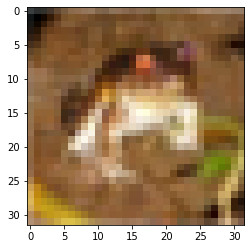

In [5]:
# FROG
plt.imshow(x_train[0])

### PreProcessing

In [6]:
max = x_train.max()

In [7]:
x_train = x_train/max

In [8]:
x_test = x_test/max

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
y_cat_train = to_categorical(y_train,10)

In [12]:
y_cat_test = to_categorical(y_test,10)

### Building the Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

# In this case a second convolutionary layer will be added due to the fact that we have more info 28*28 < 32*32*3
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [16]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [17]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop], verbose=1)

Epoch 1/15
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5011 - accuracy: 0.4604 - val_loss: 1.2734 - val_accuracy: 0.5432
Epoch 2/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1766 - accuracy: 0.5845 - val_loss: 1.2250 - val_accuracy: 0.5701
Epoch 3/15
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0286 - accuracy: 0.6384 - val_loss: 1.0190 - val_accuracy: 0.6474
Epoch 4/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9182 - accuracy: 0.6798 - val_loss: 1.0224 - val_accuracy: 0.6438
Epoch 5/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8313 - accuracy: 0.7098 - val_loss: 0.9620 - val_accuracy: 0.6659
Epoch 6/15
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7595 - accuracy: 0.7356 - val_loss: 0.9749 - val_accuracy: 0.6708
Epoch 7/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6853 - accuracy: 0.7615 - val_loss: 0.9764 -

In [18]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [19]:
losses = pd.DataFrame(model.history.history)

In [20]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.501077,0.46042,1.273380,0.5432
1,1.176631,0.58448,1.224971,0.5701
2,1.028630,0.63844,1.019043,0.6474
3,0.918205,0.67976,1.022425,0.6438
4,0.831266,0.70976,0.961984,0.6659


<AxesSubplot:>

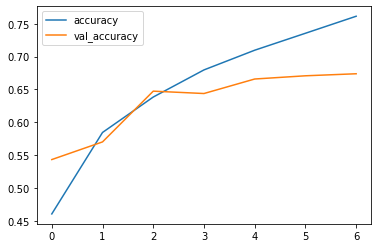

In [21]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

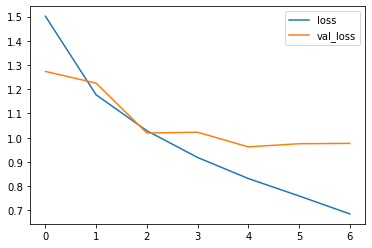

In [22]:
losses[['loss','val_loss']].plot()

In [23]:
model.metrics_names

['loss', 'accuracy']

In [24]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.9764092564582825, 0.6739000082015991]


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
predictions = model.predict(x_test)
y_pred = [val.argmax() for val in predictions]

313/313 [==============================] - 2s 6ms/step


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1000
           1       0.79      0.76      0.78      1000
           2       0.61      0.51      0.56      1000
           3       0.55      0.42      0.48      1000
           4       0.65      0.61      0.63      1000
           5       0.56      0.60      0.58      1000
           6       0.67      0.80      0.73      1000
           7       0.67      0.76      0.71      1000
           8       0.76      0.80      0.78      1000
           9       0.69      0.79      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [29]:
confusion_matrix(y_test,y_pred)

array([[672,  29,  47,  14,  26,  11,  20,  18, 103,  60],
       [ 14, 763,   5,   5,   3,  11,  14,  12,  32, 141],
       [ 58,   9, 513,  57,  77,  79, 116,  49,  20,  22],
       [ 15,  18,  67, 422,  69, 195,  94,  73,  17,  30],
       [ 21,   7,  65,  55, 607,  42,  74,  96,  16,  17],
       [  8,   7,  54, 132,  43, 605,  48,  78,  11,  14],
       [  3,  14,  38,  38,  30,  38, 800,  20,   8,  11],
       [ 14,   7,  28,  24,  58,  70,   8, 763,   8,  20],
       [ 54,  34,  15,  12,  11,  13,  11,   8, 803,  39],
       [ 15,  79,  13,   7,   7,  12,  13,  18,  45, 791]], dtype=int64)

In [64]:
my_image = x_test[9999]

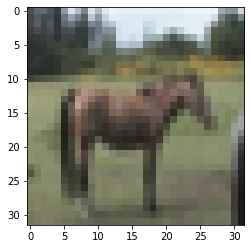

In [65]:
plt.imshow(my_image)

In [66]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3)).argmax()

1/1 [==============================] - 0s 16ms/step


7